In [86]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data_assignment.csv')

In [3]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
data.shape

(8523, 12)

In [9]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [12]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [18]:
data['Item_Identifier'].apply(lambda x : str(x)[:2]).value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [20]:
data['Item_Identifier_code'] = data['Item_Identifier'].apply(lambda x : str(x)[:2])

In [21]:
data[['Item_Identifier_code','Item_Type' ]]

,Item_Identifier_code,Item_Type
0,FD,Dairy
1,DR,Soft Drinks
2,FD,Meat
3,FD,Fruits and Vegetables
4,NC,Household
...,...,...
8518,FD,Snack Foods
8519,FD,Baking Goods
8520,NC,Health and Hygiene
8521,FD,Snack Foods


In [22]:
data.groupby('Item_Identifier_code')['Item_Type'].value_counts()

Item_Identifier_code  Item_Type            
DR                    Soft Drinks               445
                      Hard Drinks               214
                      Dairy                     140
FD                    Fruits and Vegetables    1232
                      Snack Foods              1200
                      Frozen Foods              856
                      Canned                    649
                      Baking Goods              648
                      Dairy                     542
                      Meat                      425
                      Breads                    251
                      Starchy Foods             148
                      Breakfast                 110
                      Seafood                    64
NC                    Household                 910
                      Health and Hygiene        520
                      Others                    169
Name: Item_Type, dtype: int64

In [26]:
data.groupby(['Item_Identifier','Item_Type'])['Item_Weight'].mean().reset_index().head(25)

,Item_Identifier,Item_Type,Item_Weight
0,DRA12,Soft Drinks,11.600
1,DRA24,Soft Drinks,19.350
2,DRA59,Soft Drinks,8.270
3,DRB01,Soft Drinks,7.390
4,DRB13,Soft Drinks,6.115
5,DRB24,Soft Drinks,8.785
6,DRB25,Soft Drinks,12.300
7,DRB48,Soft Drinks,16.750
8,DRC01,Soft Drinks,5.920
9,DRC12,Soft Drinks,17.850


<AxesSubplot:>

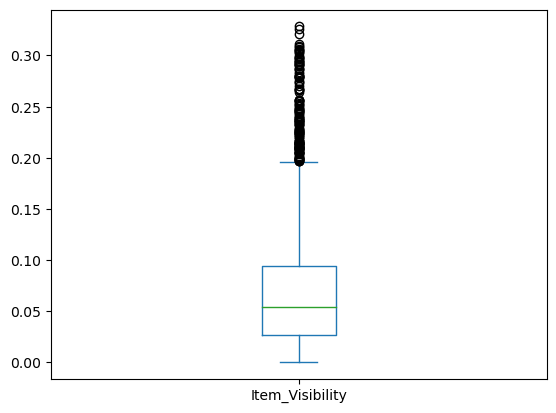

In [33]:
data.drop(columns=['Item_Weight','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']).plot(kind = 'box')


In [38]:
data['Item_Weight'] = data.groupby(['Item_Identifier_code','Item_Type']).Item_Weight.transform(lambda x: x.fillna(x.mean())
                                                                   )

In [39]:
data['Item_Weight'].isna().sum()

0

In [40]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_code
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [42]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [44]:
data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular', 'low fat' : 'Low Fat'}, inplace = True)

In [45]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:ylabel='Frequency'>

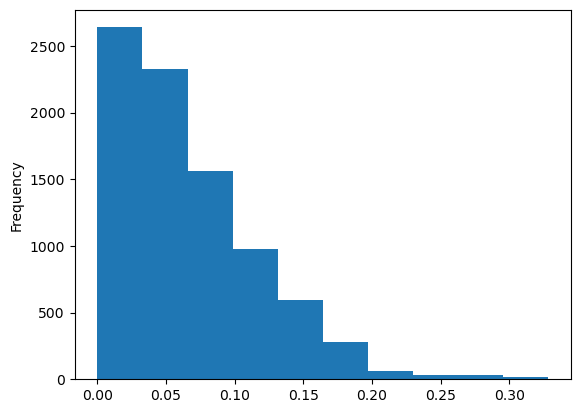

In [49]:
data['Item_Visibility'].plot(kind = 'hist')

In [54]:
data[data['Item_Visibility']==0.0].Item_Type.value_counts()


Fruits and Vegetables    87
Snack Foods              68
Household                51
Frozen Foods             51
Baking Goods             45
Dairy                    38
Soft Drinks              34
Health and Hygiene       33
Canned                   33
Meat                     20
Breads                   17
Hard Drinks              17
Starchy Foods            15
Others                   10
Seafood                   4
Breakfast                 3
Name: Item_Type, dtype: int64

In [55]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [58]:
data['Outlet_Age'] = 2023 - data['Outlet_Establishment_Year']

In [59]:
del  data['Outlet_Establishment_Year']

In [60]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_code,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,24
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,14
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,FD,24
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,FD,25
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,FD,36
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,NaN,Tier 2,Supermarket Type1,549.2850,FD,21
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,NC,19
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,FD,14


In [62]:
data['Outlet_Size'].isna().sum()

2410

In [63]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [73]:
data['Outlet_Size'] = data.groupby(['Outlet_Type']).Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))


In [74]:
data.isna().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Item_Identifier_code    0
Outlet_Age              0
dtype: int64

In [77]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [78]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 1.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 2.0 MB/s eta 0:00:002.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.2 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.0/653.0 kB 2.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 3.2 MB/s eta 0:00:003.4 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:00:01


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=36eebb67ce0ac74420b824a41270bb4fae057a88b96b84c5fc57df73fc04b48b
  Stored in directory: /Users/mohamednoordeenalaudeen/Library/Caches/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.


In [79]:
import pandas_profiling as pp

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_76601/1872674328.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [80]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
data['Outlet_Identifier'].nunique()

10

In [87]:
data.select_dtypes(exclude = np.number)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_code
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,FD
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store,FD
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,NC
...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1,FD
8519,FDS36,Regular,Baking Goods,OUT045,Small,Tier 2,Supermarket Type1,FD
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1,NC
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2,FD


In [ ]:
# Please complete this

In [ ]:
1. Drop the Item identifier
2. convert all other categorical data to one hot
3. concat the numerical data and one hoted categorical data
4. split train and test
5. build the model on train
6. predict the train
7. find the train error
8. predict on test
9. find the test error
10. compare the train and test error